<a href="https://colab.research.google.com/github/namdori61/colab-playground/blob/master/CV_Multiclass_classification_CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reference
Pytorch 'TRAINING A CLASSIFIER' tutorial: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py

In [50]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [52]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='/content/gdrive/My Drive/tutorials/data',
                                             train=True,
                                             download=True,
                                             transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=4,
                                           shuffle=True,
                                           num_workers=2)

test_dataset = torchvision.datasets.CIFAR10(root='/content/gdrive/My Drive/tutorials/data',
                                            train=False,
                                            download=True,
                                            transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=4,
                                          shuffle=False,
                                          num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


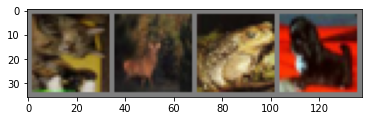

  cat  deer  frog   dog


In [53]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [65]:
net = CNN()

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

net.to(device)

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [67]:
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.939
[1,  4000] loss: 1.654
[1,  6000] loss: 1.576
[1,  8000] loss: 1.505
[1, 10000] loss: 1.459
[1, 12000] loss: 1.397
[2,  2000] loss: 1.345
[2,  4000] loss: 1.319
[2,  6000] loss: 1.314
[2,  8000] loss: 1.288
[2, 10000] loss: 1.259
[2, 12000] loss: 1.247
[3,  2000] loss: 1.190
[3,  4000] loss: 1.178
[3,  6000] loss: 1.183
[3,  8000] loss: 1.173
[3, 10000] loss: 1.172
[3, 12000] loss: 1.175
[4,  2000] loss: 1.087
[4,  4000] loss: 1.112
[4,  6000] loss: 1.133
[4,  8000] loss: 1.099
[4, 10000] loss: 1.117
[4, 12000] loss: 1.086
[5,  2000] loss: 1.029
[5,  4000] loss: 1.049
[5,  6000] loss: 1.022
[5,  8000] loss: 1.038
[5, 10000] loss: 1.063
[5, 12000] loss: 1.071
[6,  2000] loss: 0.978
[6,  4000] loss: 1.005
[6,  6000] loss: 1.018
[6,  8000] loss: 1.007
[6, 10000] loss: 1.003
[6, 12000] loss: 1.002
[7,  2000] loss: 0.935
[7,  4000] loss: 0.966
[7,  6000] loss: 0.956
[7,  8000] loss: 0.986
[7, 10000] loss: 0.995
[7, 12000] loss: 0.985
[8,  2000] loss: 0.896
[8,  4000] 

In [0]:
PATH = '/content/gdrive/My Drive/tutorials/model/cifar_cnn.pth'
torch.save(net.state_dict(), PATH)

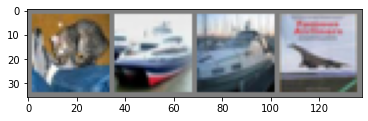

GroundTruth:    cat  ship  ship plane


In [69]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [70]:
net = CNN()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [0]:
outputs = net(images)

In [72]:
_, predicted = torch.max(outputs,1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship plane  ship


In [73]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy  of the network on the 10000 test images: %d %%' 
      % (100 * correct / total))

Accuracy  of the network on the 10000 test images: 61 %


In [74]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%'
          % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 65 %
Accuracy of   car : 63 %
Accuracy of  bird : 52 %
Accuracy of   cat : 42 %
Accuracy of  deer : 56 %
Accuracy of   dog : 49 %
Accuracy of  frog : 71 %
Accuracy of horse : 68 %
Accuracy of  ship : 87 %
Accuracy of truck : 59 %
